## Investigating a Baseball Dataset

#### Problem Definition

Where do the best baseball players come from?

Will a baseball player´s birth location or college location relate to salary or awards?

#### Approach to answer question

Attributes will be needed to describe the location each player is from, these will form independent variables.

These will give a variety of values about where the player came from. However, it boils down to two independent variables, college location and birth location. These variables have different scales i.e. country, state, city. The right granularity will need to be chosen.

To use more independent variables height and weight can also be investigated.

Salaries, AwardsPlayers, AllStarFull and/or HallofFame can be used to give an indication to the quality of the player. Any of these can be used as a dependent variable or a dependent variable could be created out of a combination of these variables.

The dataset has been processed using numpy and pandas to clean, create new variables and merge tables together. See further into the report for a section on data processing. See the preprocessing module for the code used.

An examination of the data will be described followed by data analysis and conclusions. The data analysis is not exhaustive so observations to do not lead to robust conclusions in this report. Any inference is tentative and would require further work to become robust.

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
# Use the top level of the repository
os.chdir(os.path.join("../.."))
# Helper functions made to create polished plots
from ballbase import figures

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import Baseball_data_investigation
df = Baseball_data_investigation.main()


Processed Hall of Fame data

Processed All Star data

Processed Player Awards data

Processed Salary data

Processed College Locations

Processed master file

Master_Merge is ready

Data Audit complete


#### Data Examination

Overall the dataset is well organised and good to use.

Some datasets display issues regarding how the values are populated

TypeError: univariate() got an unexpected keyword argument 'funky'

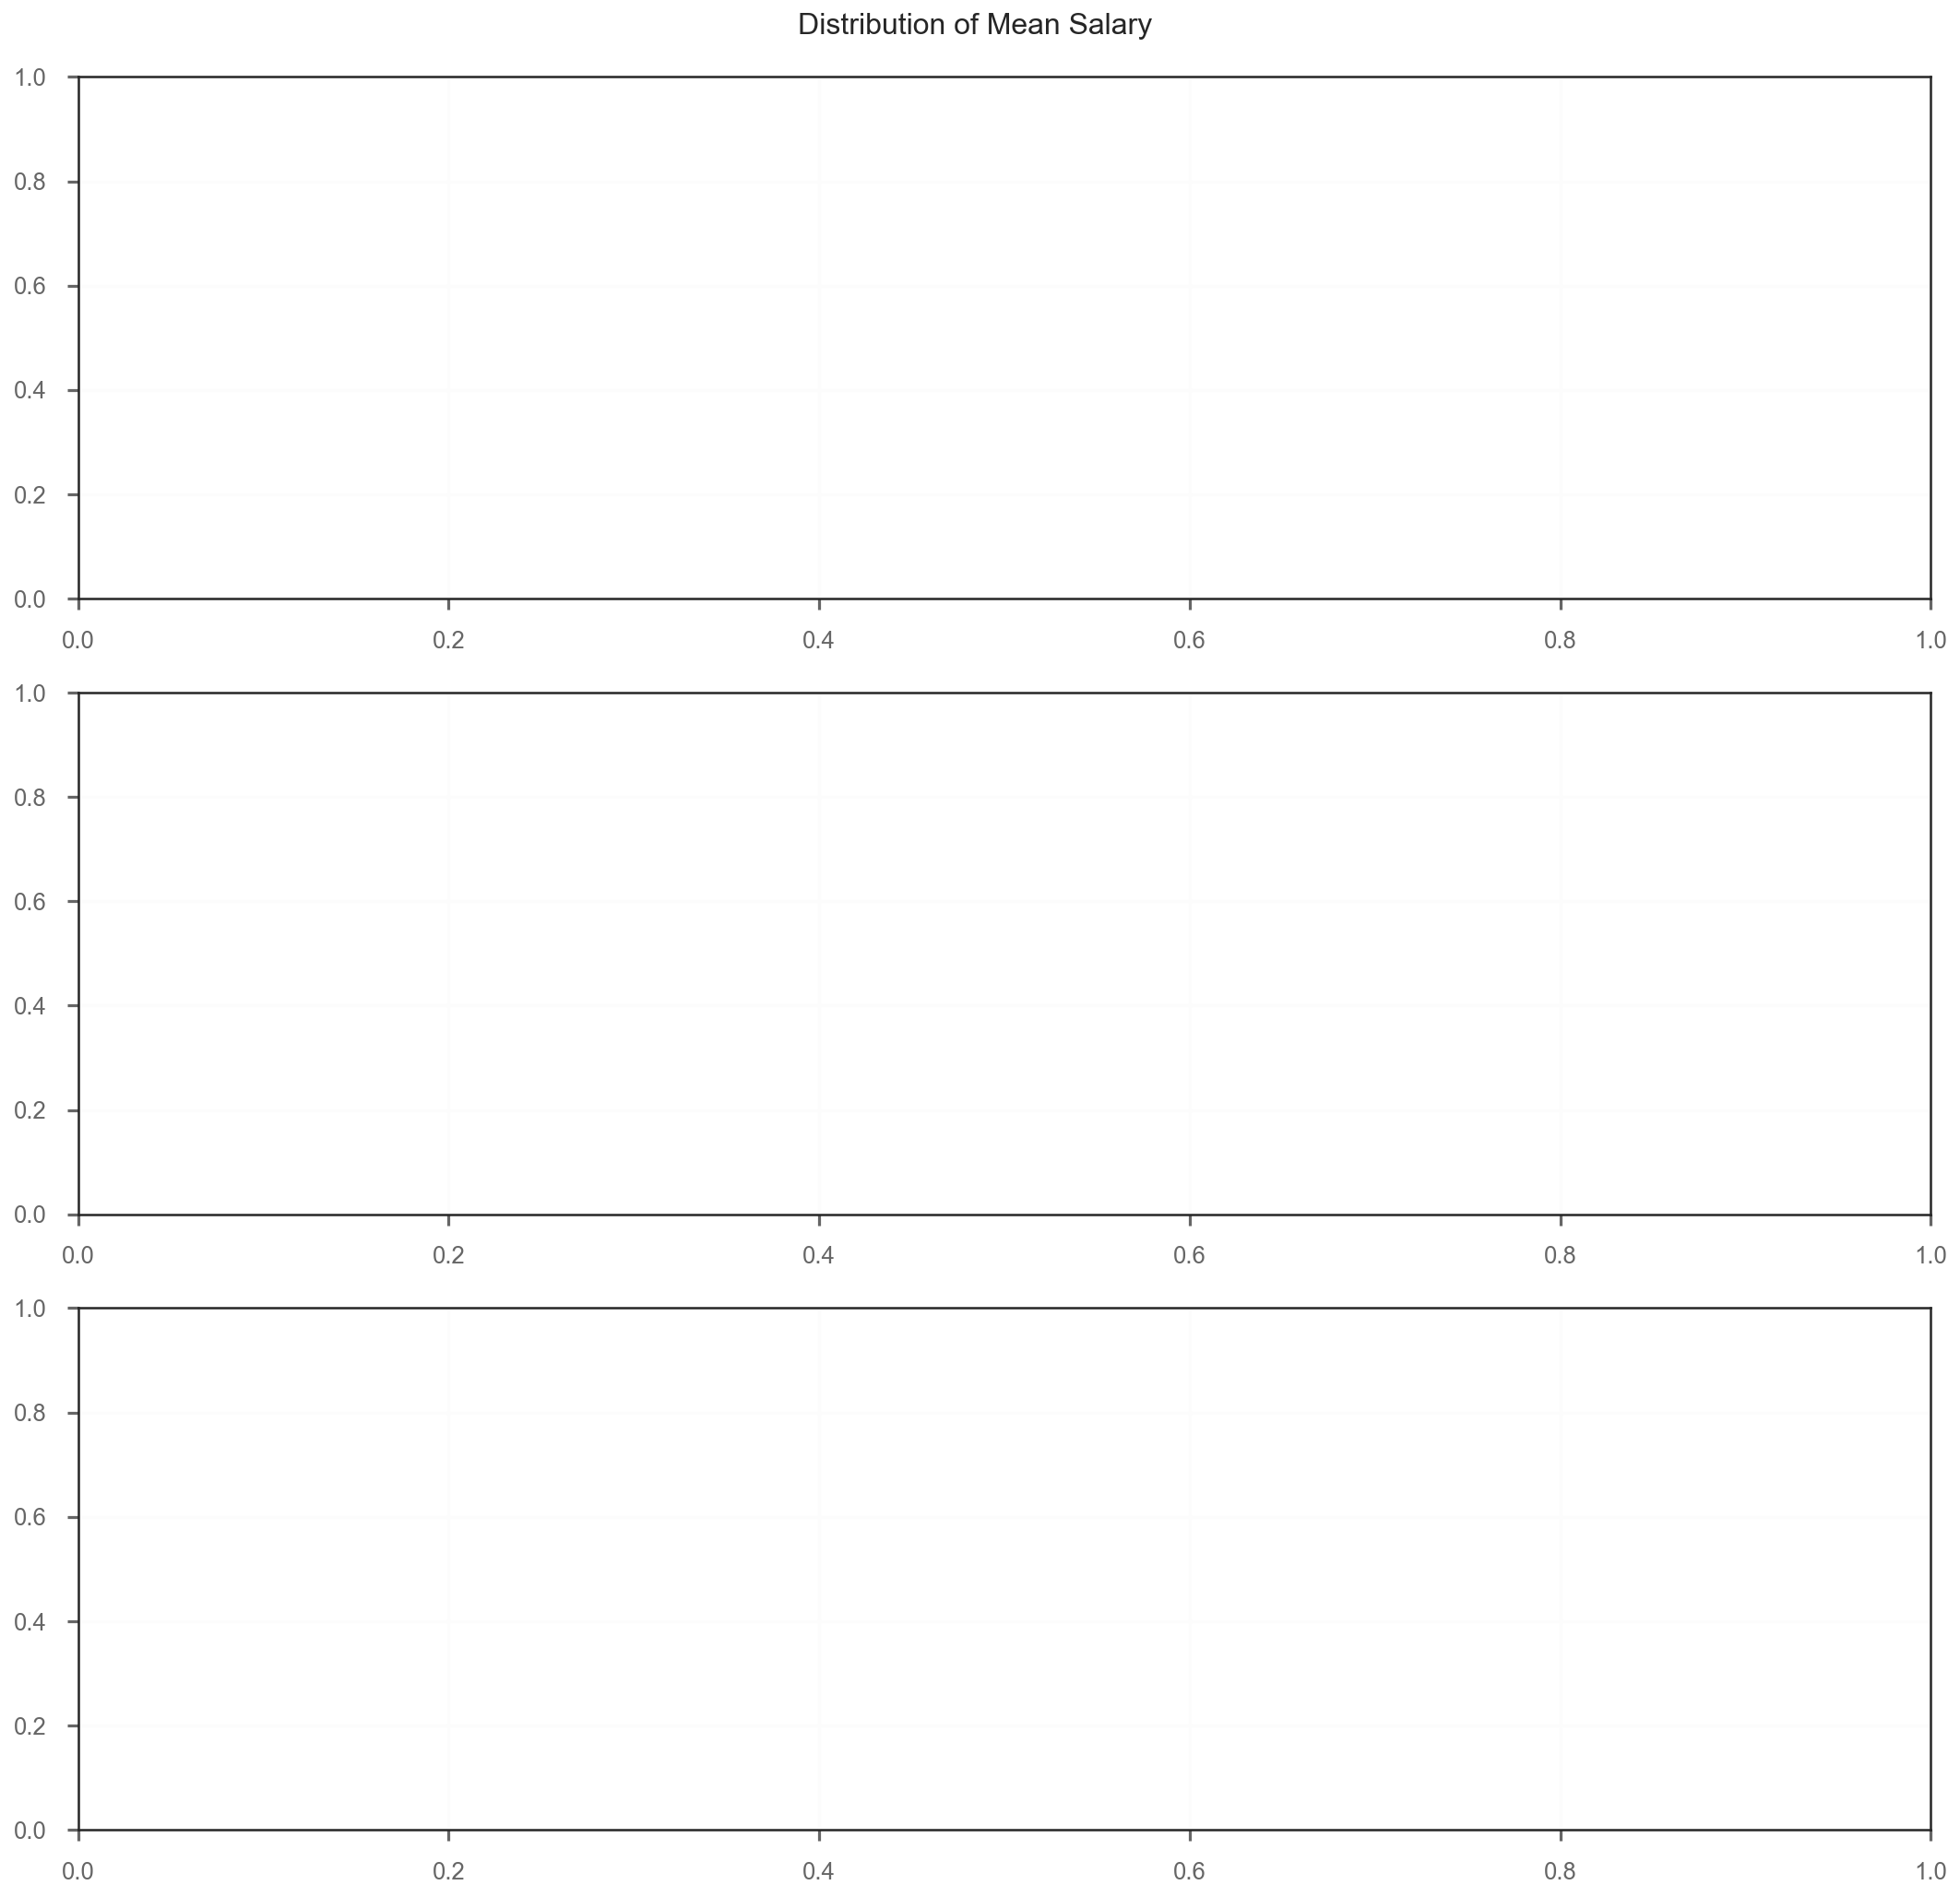

In [2]:
fig_a = figures.dist_transform_plot(df['mean_salary'].dropna(), 'Mean Salary', bin_n=None)